In [1]:
# Import dependencies
import pandas as pd
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import distinct

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
#Explore data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0)]

In [8]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [9]:
#Reflect database and query
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

In [10]:
session = Session(engine)

In [11]:
# Find latsest date to determine range for last 112 months
max_date =session.query(func.max(Measurement.date)) 
max_date[:1]

[('2017-08-23')]

In [12]:
# Create a query for the `pcrp` for last 12 months

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23'))
results[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [13]:
# Unpack the dates and pcrp into separate lists
dates = [(row[0]) for row in results]
measures = [row[1] for row in results]
type(dates)
type(measures)

list

In [14]:
# Create dataframe from lists above
dates_df = pd.DataFrame(measures,dates)
#dates_df.set_index('dates', inplace=True)
dates_df.head()


,0
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


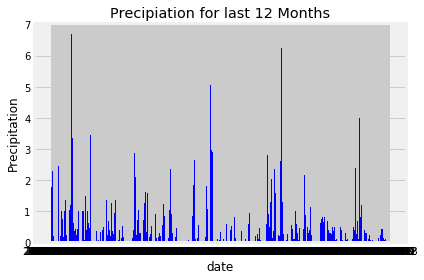

In [15]:
fig, ax = plt.subplots()
ax.bar(dates, measures, color="b")
ax.set_xlabel("date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipiation for last 12 Months")
fig.tight_layout()
plt.show()

In [16]:
#summary statistics for the preciptiation data
max_prcp =session.query(func.max(Measurement.prcp)) 
max_prcp[:1]
min_prcp =session.query(func.min(Measurement.prcp)) 
min_prcp[:1]
avg_prcp =session.query(func.avg(Measurement.prcp)) 
avg_prcp[:1]
# max_date[:1]
# Min
# Mode
# Median
# Avg

[(0.16064353974479206)]

In [18]:
# STATION ANALYSIS

In [19]:
# count distinct "station" values
total_stations =session.query(func.count(distinct(Measurement.station)))
total_stations[:1]

[(9)]

In [20]:
# List distinct "station" values
total_stations =session.query(distinct(Measurement.station)).all()
type(total_stations)

list

In [21]:
#Return a count of observations grouped by station 
  
observations = session.query(Measurement.station, func.count(Measurement.prcp)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.prcp).desc()).all()
observations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [22]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs)
temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23'))
temp[:5]

[('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0)]

In [23]:
# Filter the last 12 months of temperature observation data (tobs) by station with highest # obeservations
temp1 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
filter(Measurement.station=='USC00519281')
temp1[:5]

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0)]

In [24]:
# Frequency of temperature data
Frequency = session.query(Measurement.tobs,func.count(Measurement.tobs)).filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
group_by(Measurement.tobs)
Frequency.all()

[(58.0, 1),
 (59.0, 3),
 (60.0, 6),
 (61.0, 4),
 (62.0, 13),
 (63.0, 15),
 (64.0, 23),
 (65.0, 26),
 (66.0, 28),
 (67.0, 47),
 (68.0, 49),
 (69.0, 85),
 (70.0, 102),
 (71.0, 113),
 (72.0, 114),
 (73.0, 110),
 (74.0, 160),
 (75.0, 159),
 (76.0, 186),
 (77.0, 193),
 (78.0, 179),
 (79.0, 138),
 (80.0, 132),
 (81.0, 78),
 (82.0, 38),
 (83.0, 12),
 (84.0, 6),
 (87.0, 1)]

In [25]:
# Tobs df
# Unpack the temperature and frequency into separate lists
temperature = [(row[0]) for row in Frequency]
frequency = [(row[1]) for row in Frequency]

In [26]:
temp_df = pd.DataFrame(frequency, temperature)
temp_df.head()

,0
58.0,1
59.0,3
60.0,6
61.0,4
62.0,13


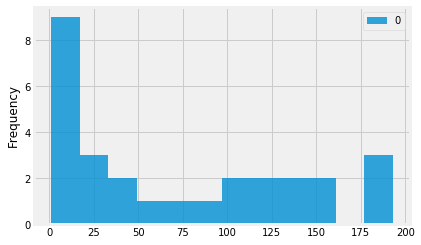

In [27]:
# the histogram of the data

temp_df.plot.hist(alpha=0.8, bins = 12)
plt.show()

In [28]:
# TEMPERATURE ANALYSIS

In [30]:
# function calc_temps that will accept a start date and end date in the format %Y-%m-%d and 
# return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date,end_date):
#     """This function accepts a start date and end date in the format %Y-%m-%d and 
#     return the minimum, average, and maximum temperatures for that range of dates."""
        return session.query(func.min(Measurement.tobs).label("temp_min"),\
                            func.avg(Measurement.tobs).label("temp_avg"),\
                            func.max(Measurement.tobs).label("temp_max")).\
                            filter(Measurement.date >= start_date).first()
calc_temps('2016-08-23','2016-09-02')
   
   #results= session.query(func.min(xxx).label("temp_min"),\
                            #func.avg(xxx).label("temp_avg"),\
                            #func.max(xxx).label("temp_max")).\
                            #filter(Measurements.date >= start_date).first()

(58.0, 74.49480455220188, 87.0)

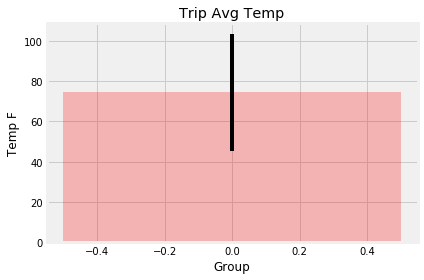

In [70]:
n_groups = 1
mean_temp = (74.5) 
std_temp = (87.0 - 58.0) 
fig, ax = plt.subplots() 
index = np.arange(0.5) 
bar_width = 1 
opacity = 0.25 
error_config = {'ecolor': '0.5'} 
temps = plt.bar(index, mean_temp, bar_width, alpha=opacity, color='r', yerr=std_temp, label='Temp F')
plt.xlabel('Group')
plt.ylabel('Temp F') 
plt.title('Trip Avg Temp') 
plt.tight_layout() 
plt.show()

In [ ]:
# CLIMATE APP

In [ ]:
from flask import Flask, jsonify

In [ ]:
app = Flask(__Climate__)

In [68]:
# Define all api routes
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Avalable Routes:<br/>"
        f"/api/v1.0/precipitation - List of precipitation by date<br/>"

        f"/api/v1.0/stations"
        f"- List of stations<br/>"

        f"//api/v1.0/tobs"
        f"- List of temperature observations for the last year<br/>"

        f"/api/v1.0/<start> and /api/v1.0/<start>/<end>"
        f"- a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.<br/>"
    )

NameError: name 'app' is not defined

In [ ]:
@app.route("/api/v1.0/countries")
def countries():
    """Return a list of all billing countries"""
    # Query all countries from the Invoices table
    results = session.query(Invoices.BillingCountry).\
        group_by(Invoices.BillingCountry).all()

    # Convert list of tuples into normal list
    countries_list = list(np.ravel(results))

    return jsonify(countries_list)